## Criacao de uma pasta para as tabelas

Sera criado uma pasta para armazenar as imagens

In [3]:
import os

#pasta tabelas
diretorio = "tabelas"
try:
    os.makedirs(diretorio)
    print(f"Pasta '{diretorio}' criada com sucesso.")
except FileExistsError:
    print(f"A pasta '{diretorio}' já existe.")

#pasta tabelas/vetores
vetores = f"{diretorio}/vetores"
try:
    os.makedirs(vetores)
    print(f"Pasta '{vetores}' criada com sucesso.")
except FileExistsError:
    print(f"A pasta '{vetores}' já existe.")


#pasta tabelas/notas_d
notas_d = f"{diretorio}/notas"
try:
    os.makedirs(notas_d)
    print(f"Pasta '{notas_d}' criada com sucesso.")
except FileExistsError:
    print(f"A pasta '{notas_d}' já existe.")

#pasta tabelas/questionario
questionario = f"{diretorio}/questionario"
try:
    os.makedirs(questionario)
    print(f"Pasta '{questionario}' criada com sucesso.")
except FileExistsError:
    print(f"A pasta '{questionario}' já existe.")    

#pasta tabelas/enade
enade = f"{diretorio}/enade"
try:
    os.makedirs(enade)
    print(f"Pasta '{enade}' criada com sucesso.")
except FileExistsError:
    print(f"A pasta '{enade}' já existe.")   

#pasta tabelas/percepcao_prova
percepcao_prova = f"{diretorio}/percepcao_prova"
try:
    os.makedirs(percepcao_prova)
    print(f"Pasta '{percepcao_prova}' criada com sucesso.")
except FileExistsError:
    print(f"A pasta '{percepcao_prova}' já existe.")   



A pasta 'tabelas' já existe.
A pasta 'tabelas/vetores' já existe.
A pasta 'tabelas/notas' já existe.
A pasta 'tabelas/questionario' já existe.
A pasta 'tabelas/enade' já existe.
A pasta 'tabelas/percepcao_prova' já existe.


## Analise notas IES

### Funcao Notas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np 


def percentual_acertos_por_faculdade(dir_entrada, cursos_analisados, faculdades_analisadas, colunas_questoes):
    df = pd.read_csv(dir_entrada, sep=';', usecols=['CO_IES', 'NOME_IES', 'NOME_CURSO'] + colunas_questoes)
    df['NOME_CURSO'] = df['NOME_CURSO'].str.lower()  
    df_filtrado = df[
        df['NOME_CURSO'].isin(map(str.lower, cursos_analisados)) & 
        df['CO_IES'].isin(faculdades_analisadas)
    ]
    
    
    percentuais_por_faculdade = df_filtrado.groupby('CO_IES')[colunas_questoes].mean() * 100
    return percentuais_por_faculdade, map_sigla_ies 

def tabela_ranking_qe_horizontal(percentuais, map_sigla_ies, curso_analisado, dir_destino):
    
    num_questoes = len(percentuais.columns)
    num_linhas = len(percentuais)  
    

    fig, axes = plt.subplots(1, num_questoes, figsize=(num_questoes * 5.3, num_linhas*0.3))
    
    
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    
    for ax, (questao, dados_questao) in zip(axes, percentuais.iteritems()):
        ax.axis('tight')
        ax.axis('off')
        
        dados_ordenados = dados_questao.sort_values(ascending=False)
        tabela_data = [[pos + 1, map_sigla_ies.get(co_ies, 'Outro'), f'{percentual:.2f}%'] 
                       for pos, (co_ies, percentual) in enumerate(dados_ordenados.items())]

        tabela = ax.table(cellText=tabela_data, colLabels=['Posição', 'Sigla da IES', questao], loc='center')
        tabela.auto_set_font_size(False)
        tabela.set_fontsize(13)
        tabela.scale(1.5, 1.8)
        tabela.auto_set_column_width(col=list(range(len(tabela_data[0]))))  

        for (i, j), cell in tabela.get_celld().items():
            if i == 0:  
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            if i > 0 and tabela_data[i-1][1] == sigla_destacada:  
                for col in range(len(tabela_data[i-1])):
                    cell.set_facecolor('#A4FFA4')
                    


    
    plt.subplots_adjust(left=0.2, bottom=0.2, wspace=0)  
    plt.savefig(f'{notas_d}/tabela_{dir_destino}_{curso_analisado.replace(" ", "_")}', bbox_inches='tight')
    plt.show()
    plt.close()



### Mapeamento Siglas IES

In [5]:
map_sigla_ies = {
    575: 'UFMG',
    570: 'UFRN',
    8: 'UFV',
    576: 'UFJF',
    581: 'UFRGS',
    571: 'UFPR',
    577: 'UFAL',
    573: 'UFES',
    585: 'UFSC',
    4925: 'UFABC',
    54: 'UNICAMP',
    591: 'UNIFESP',
    7: 'UFSCAR',
    56: 'UNESP',
    572: 'UFF',
    586: 'UFRJ',
    582: 'UFSM',
    271: 'UNOESTE',
    2: 'UNB',
    57: 'UEM'
}


### Entrada de dados

In [6]:
import unidecode

#Cursos a ser analisados
cursos_analisados = [ "Ciência Da Computação (Bacharelado)",'ciencia da computacao (licenciatura)']
#cursos_analisados = [ 'ciencia da computacao (licenciatura)']
#Faculdades pelo CO_IES as 20 melhores
faculdades_analisadas_CO_IES = [575, 570, 8, 576, 581, 571, 577, 573, 585, 4925, 54, 591, 7, 56, 572, 586, 582, 271, 2,57]

#Faculdade que vai ser destacada na tabela com a cor verde '#A4FFA4'
faculdade_destacada= 'UNIVERSIDADE DE BRASILIA'
sigla_destacada="UNB"
#Arquivo de entrada
dir_entrada = 'microdados_tratados/form_microdados_arq3_vetores_filtrados.csv'


#funcao para padronizar
def padronizar(lista):
    return [unidecode.unidecode(elemento).lower() for elemento in lista]
cursos_analisados=padronizar(cursos_analisados)
print(cursos_analisados)

['ciencia da computacao (bacharelado)', 'ciencia da computacao (licenciatura)']


### Notas FG

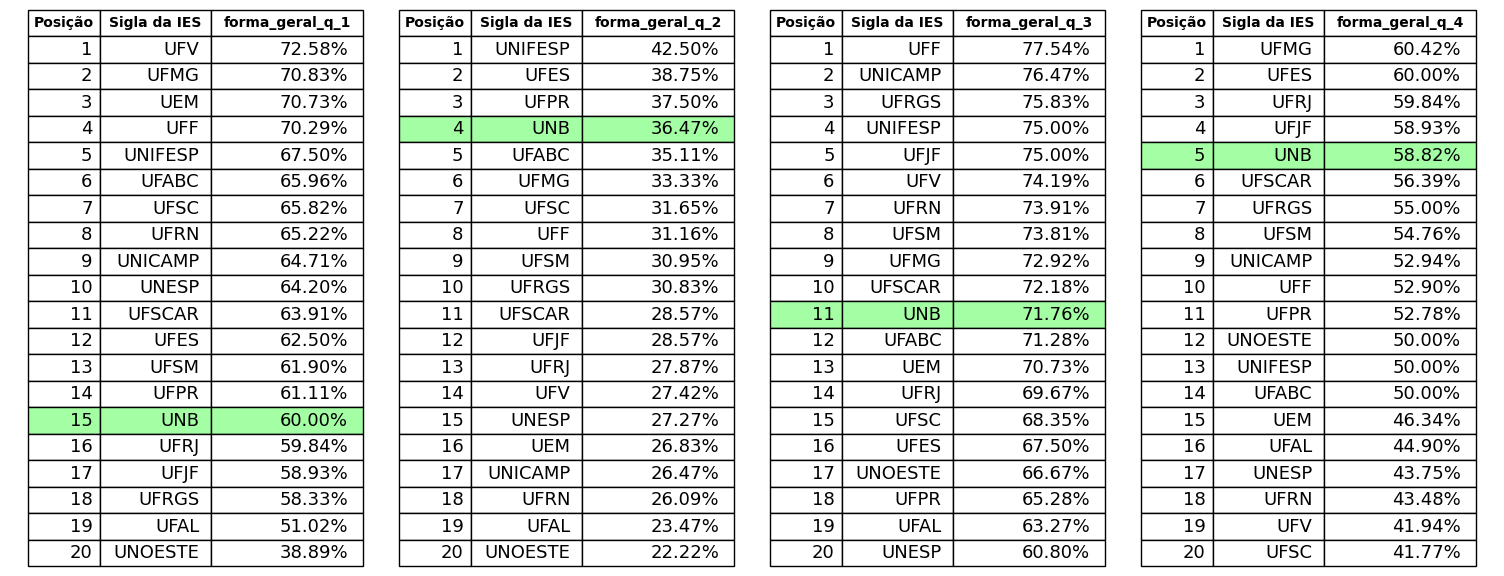

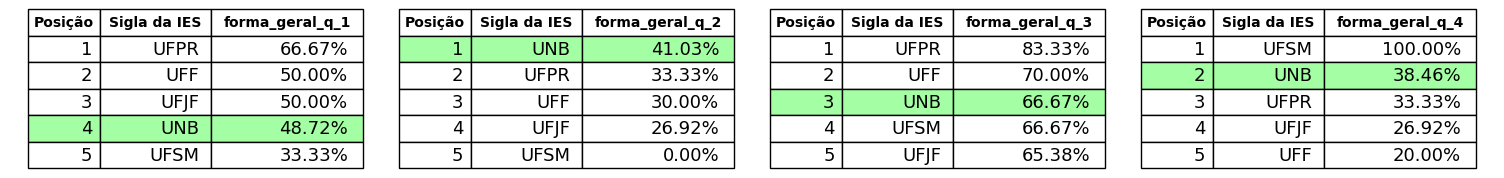

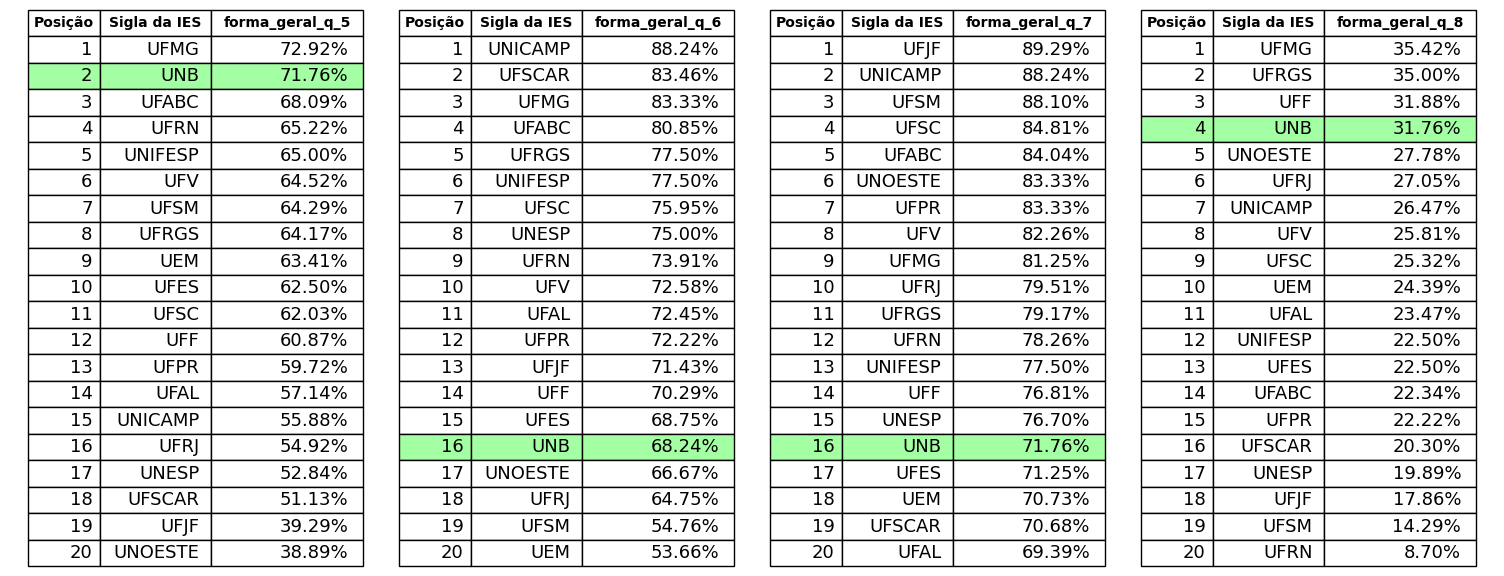

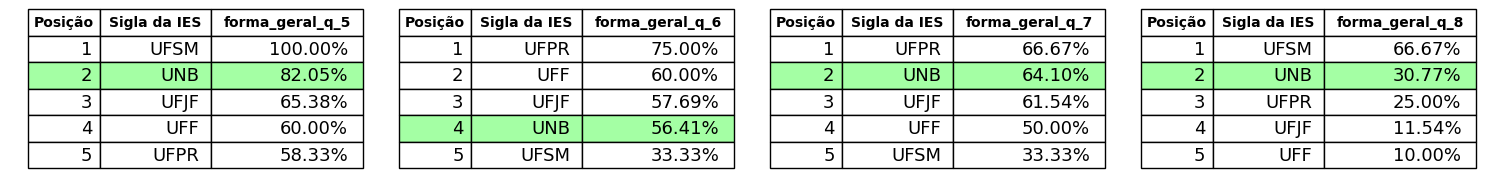

In [7]:
colunas_questoes = [f"forma_geral_q_{i}" for i in range(1, 5)]
for curso_analisado in cursos_analisados:
 
    dir_destino = "FG1"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

colunas_questoes = [f"forma_geral_q_{i}" for i in range(5, 9)]
for curso_analisado in cursos_analisados:
 
    dir_destino = "FG2"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

### Notas CE

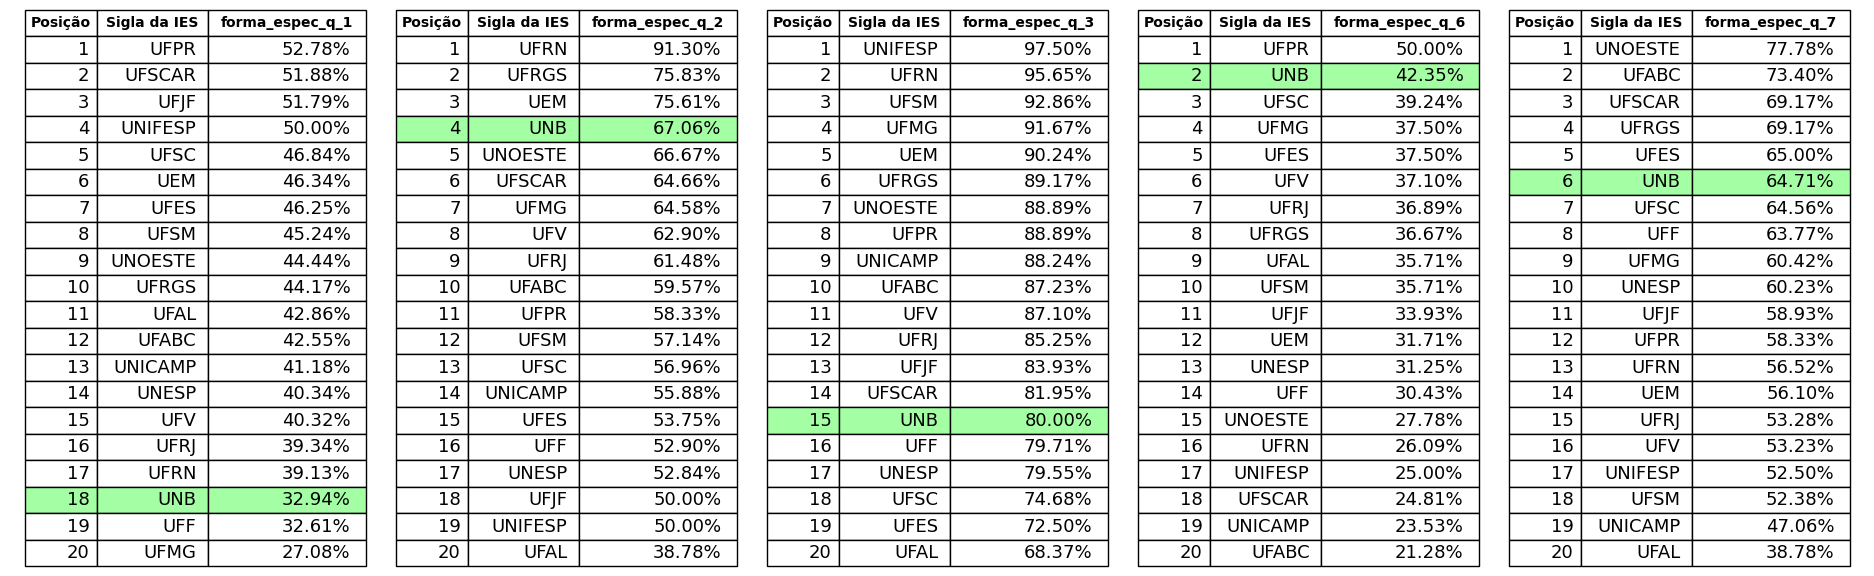

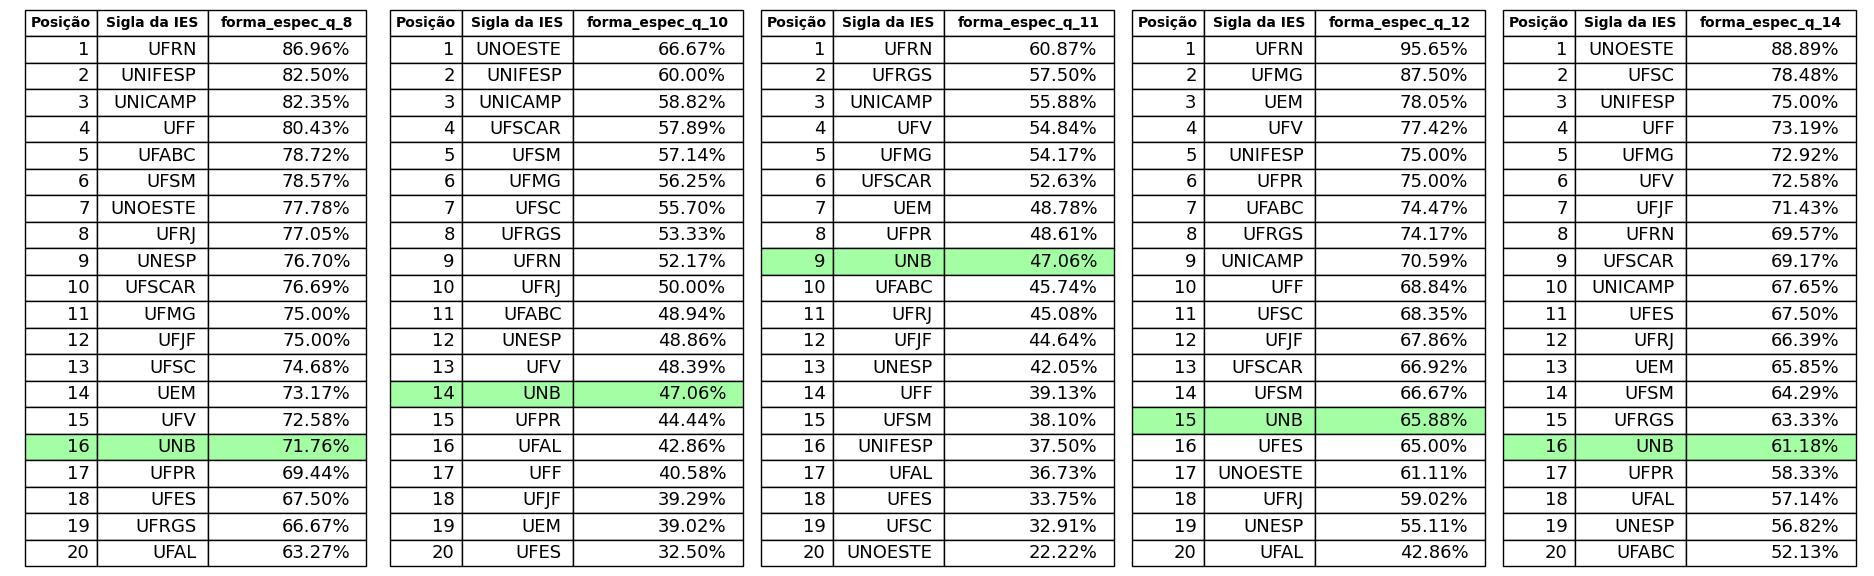

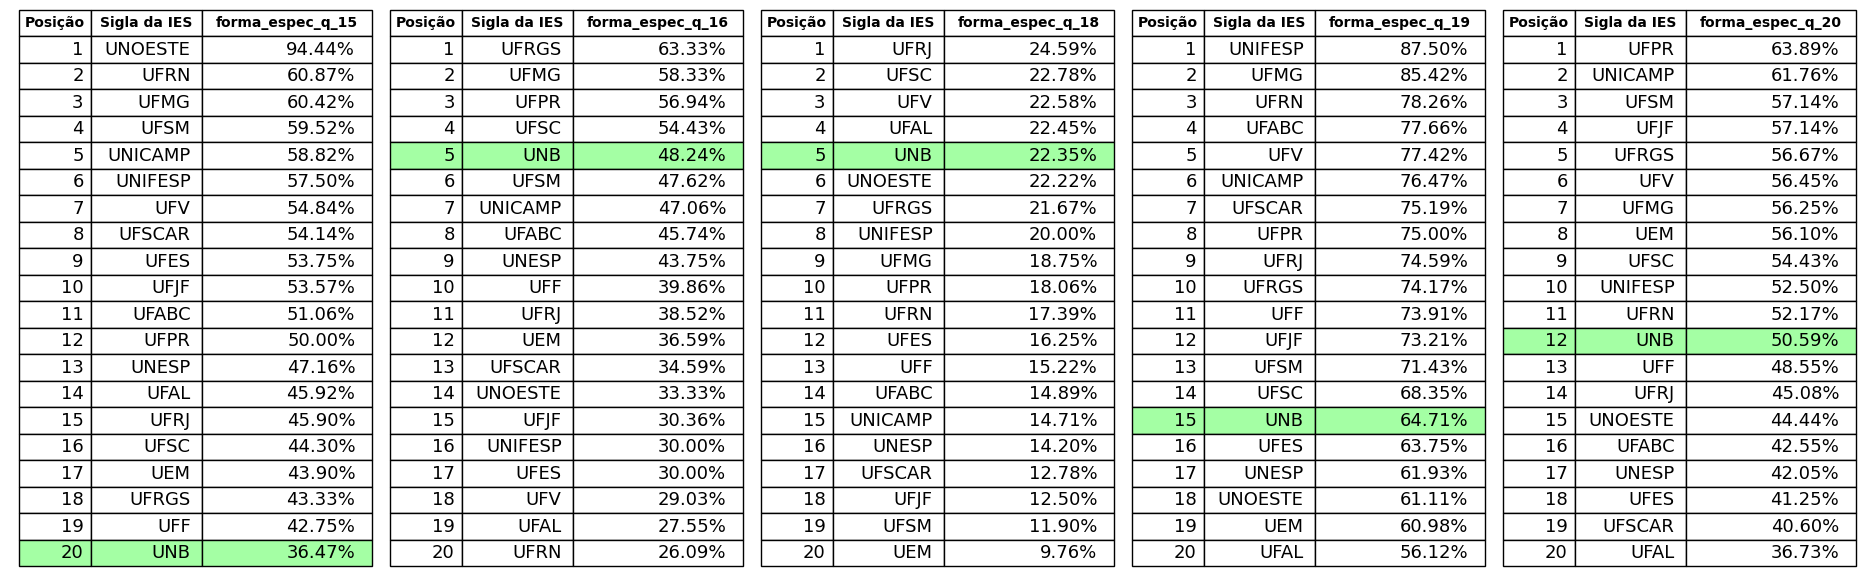

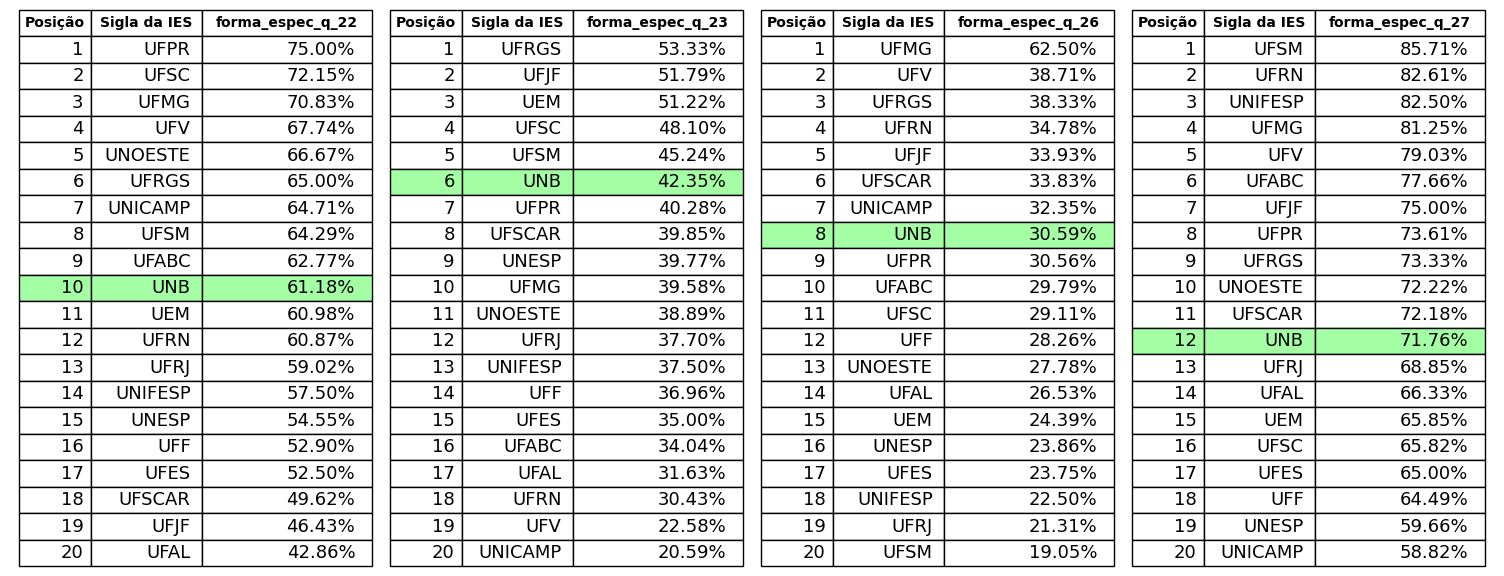

In [8]:
cursos_analisados = [ "ciencia da computacao (bacharelado)"]

colunas_questoes = [
    "forma_espec_q_1", "forma_espec_q_2", "forma_espec_q_3", "forma_espec_q_6", "forma_espec_q_7"
]
for curso_analisado in cursos_analisados:
 
    dir_destino = "CE1"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

colunas_questoes = [
    "forma_espec_q_8", "forma_espec_q_10", "forma_espec_q_11", "forma_espec_q_12", "forma_espec_q_14"
]

for curso_analisado in cursos_analisados:
 
    dir_destino = "CE2"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

colunas_questoes = [
    "forma_espec_q_15", "forma_espec_q_16", "forma_espec_q_18", "forma_espec_q_19", "forma_espec_q_20"
]

for curso_analisado in cursos_analisados:
 
    dir_destino = "CE3"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

colunas_questoes = [
    "forma_espec_q_22", "forma_espec_q_23", "forma_espec_q_26", "forma_espec_q_27"
]

for curso_analisado in cursos_analisados:
 
    dir_destino = "CE4"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

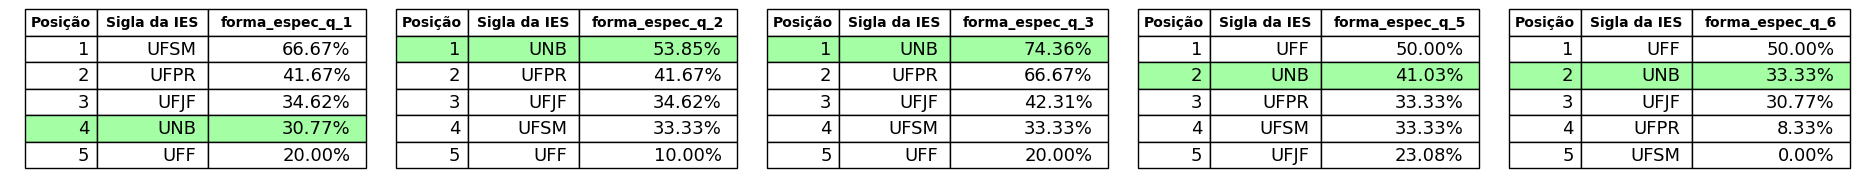

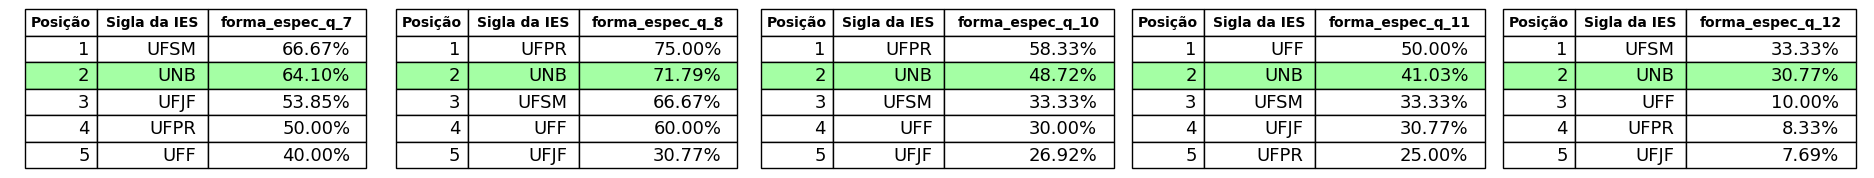

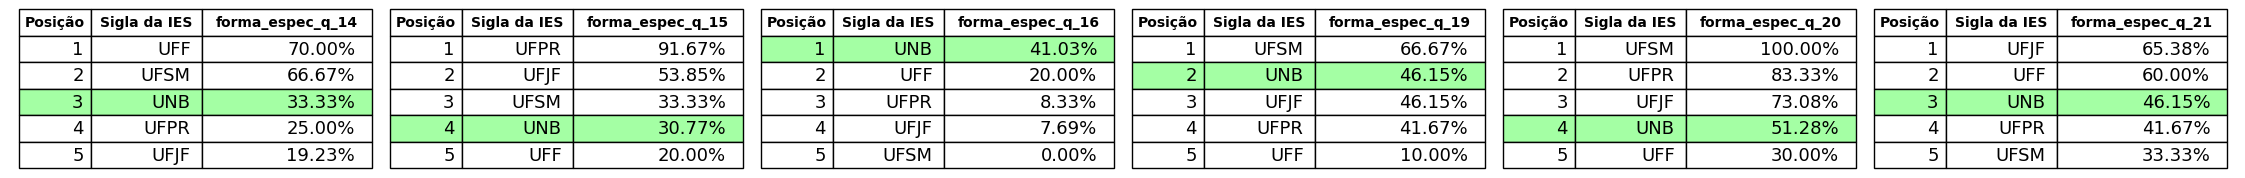

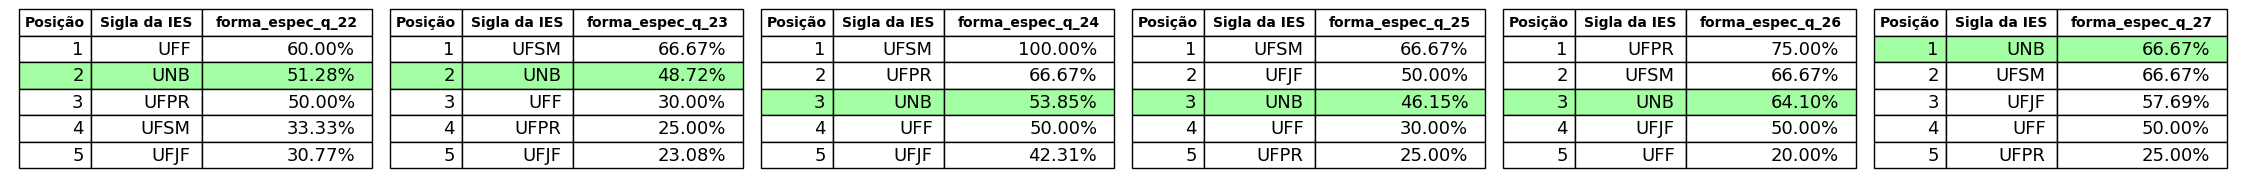

In [9]:
cursos_analisados = [ 'ciencia da computacao (licenciatura)']
colunas_questoes = [
    "forma_espec_q_1","forma_espec_q_2","forma_espec_q_3","forma_espec_q_5","forma_espec_q_6",
]

for curso_analisado in cursos_analisados:
 
    dir_destino = "CE1"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)
colunas_questoes = [
    "forma_espec_q_7","forma_espec_q_8","forma_espec_q_10","forma_espec_q_11","forma_espec_q_12",
]

for curso_analisado in cursos_analisados:
 
    dir_destino = "CE2"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

colunas_questoes = [
    "forma_espec_q_14","forma_espec_q_15","forma_espec_q_16","forma_espec_q_19","forma_espec_q_20","forma_espec_q_21",
]

for curso_analisado in cursos_analisados:
 
    dir_destino = "CE3"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

colunas_questoes = [
    "forma_espec_q_22","forma_espec_q_23","forma_espec_q_24","forma_espec_q_25","forma_espec_q_26","forma_espec_q_27"
]

for curso_analisado in cursos_analisados:
 
    dir_destino = "CE4"
    percentuais_acertos, mapeamento_ies_curso = percentual_acertos_por_faculdade(
        dir_entrada, [curso_analisado], faculdades_analisadas_CO_IES, colunas_questoes
    )
    tabela_ranking_qe_horizontal(percentuais_acertos, mapeamento_ies_curso, curso_analisado, dir_destino)

## teste

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

def criar_mapeamento_co_ies_para_nome_ies(dir_entrada):
    df = pd.read_csv(dir_entrada, sep=';', usecols=['CO_IES', 'NOME_IES'])
    mapeamento = df.drop_duplicates().set_index('CO_IES')['NOME_IES'].to_dict()
    return mapeamento

def formatar_curso(course_name):
    return unidecode(course_name).lower()

def grafico_microdados_barras(dir_entrada, qe_column, faculdades_filtradas_CO_IES, cursos_analisados, dir_destino, titulo):
    df = pd.read_csv(dir_entrada, sep=';', usecols=['CO_IES', 'NOME_CURSO', qe_column])
    mapeamento_ies = criar_mapeamento_co_ies_para_nome_ies(dir_entrada)
    
    if faculdades_filtradas_CO_IES:
        df = df[df['CO_IES'].isin(faculdades_filtradas_CO_IES)]

    curso_map = df['NOME_CURSO'].dropna().unique()
    curso_map = {formatar_curso(curso): curso for curso in curso_map}
    df['NOME_CURSO_FORMATADO'] = df['NOME_CURSO'].apply(formatar_curso)
    cursos_analisados_formatados = [formatar_curso(curso) for curso in cursos_analisados]
    df_filtrado = df[df['NOME_CURSO_FORMATADO'].isin(cursos_analisados_formatados)]

    total_counts_per_course = df_filtrado[df_filtrado[qe_column].notna()].groupby('NOME_CURSO_FORMATADO')[qe_column].count()  
    

    plt.figure(figsize=(len(cursos_analisados)*10, 8))
    ax = sns.countplot(x='NOME_CURSO_FORMATADO', hue=qe_column, data=df_filtrado, palette='Set2', edgecolor='black', linewidth=1.2,
                       order=total_counts_per_course.index, width=0.9)
    

    max_count = df_filtrado.groupby('NOME_CURSO_FORMATADO')[qe_column].value_counts().max()

    ax.set_ylim(0, max_count*1.1)

    ax.set_xticklabels([curso_map[curso] for curso in total_counts_per_course.index], rotation=0, fontsize=14)
    nomes_ies = ', '.join([mapeamento_ies.get(co_ies, 'Desconhecida') for co_ies in faculdades_filtradas_CO_IES])
    plt.title(f"{titulo}\n{nomes_ies}", fontsize=16)
    plt.legend(title=qe_column, title_fontsize='13', fontsize='12')
    plt.xlabel('Curso',fontsize=15)
    plt.ylabel('Alunos',fontsize=15)


    handles, labels = ax.get_legend_handles_labels()
    legend_labels = []
    for handle, label in zip(handles, labels):
        count = df_filtrado[df_filtrado[qe_column] == label]['NOME_CURSO_FORMATADO'].value_counts()
        for course, course_count in count.iteritems():
            total = total_counts_per_course.get(course, 0)
            percentage = course_count / total * 100 if total > 0 else 0
            legend_labels.append(f"{label} ({percentage:.2f}%) - {course_count}")
    plt.legend(handles, legend_labels, title=qe_column, title_fontsize='13', fontsize='12')

    primeiro_curso, primeiro_total = next(iter(total_counts_per_course.items()))
    segundo_curso, segundo_total = None, None
    cursos_lista = list(total_counts_per_course.items())

    if len(cursos_lista) > 1:
        segundo_curso, segundo_total = cursos_lista[1]


    contador = 0

    for p in ax.patches:
        curso_label = ax.get_xticklabels()[int(p.get_x() + p.get_width() / 2.0)].get_text()
        curso_label_formatado = formatar_curso(curso_label)

    
        total_usado = primeiro_total if contador % 2 == 0 else segundo_total
        contador += 1

        if total_usado > 0:
            percentage = 100 * p.get_height() / total_usado
            annotation = f'{int(p.get_height())}\n({percentage:.2f}%)'
        else:
            annotation = f'{int(p.get_height())}\n(N/A)'

        ax.annotate(f"{annotation}", (p.get_x() + p.get_width() / 2.0, p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 18),
                    textcoords='offset points')
        
    plt.legend(title=qe_column, title_fontsize='13', fontsize='12')

                    
    plt.savefig(dir_destino, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
